# Phylogenetic Distance Calculation from RhizCG 2013

Test hypotheses on phylogenetic vs functional control of microbial community
Use phylogeny created from rbcL and matK in phylogenerator 20160209_phylogeny.tre. 
Test hypothesis on annuals plus B73

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(foreach)
#library(lsmeans)
library(Hmisc)
library(lme4)
library(lmerTest)
library(ggplot2)
library(plyr)
library(dplyr)
library(tidyr)
library(pbkrtest)
library(gridExtra)
library(reshape2)
library(picante)
library(ape)
library(doParallel)
library(phyloseq)


/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: lattice

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: survival

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: Formula

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rp

In [3]:
%%R
# Initialize corMLPE 
source('/home/bryan/corMLPE/corMLPE.R')

In [4]:
%%R
workDir = '/home/bryan/RhizCG/PhyDist/'


# Set up tables and tree 

In [5]:
%%R
setwd(workDir)
# read phylogenetic distance, expanded with 0.0002 between maize lines
phy_expand = read.csv(file = "phyDist_expanded.csv", header = TRUE)
colnames(phy_expand)[12] = "75-062"

In [6]:
%%R
phy_expand

         FAGES   AMAPO   HELAN   ABUTH   GLYMA   SORBI     B73   ECHCG   SETFA
FAGES  0.00000 0.23210 0.25302 0.27096 0.35879 0.43476 0.43787 0.43985 0.43592
AMAPO  0.23210 0.00000 0.20952 0.22746 0.31529 0.39126 0.39437 0.39635 0.39242
HELAN  0.25302 0.20952 0.00000 0.19116 0.27899 0.35496 0.35807 0.36005 0.35612
ABUTH  0.27096 0.22746 0.19116 0.00000 0.24183 0.35370 0.35681 0.35879 0.35486
GLYMA  0.35879 0.31529 0.27899 0.24183 0.00000 0.44153 0.44464 0.44662 0.44269
SORBI  0.43476 0.39126 0.35496 0.35370 0.44153 0.00000 0.01153 0.03193 0.02800
B73    0.43787 0.39437 0.35807 0.35681 0.44464 0.01153 0.00000 0.03504 0.03111
ECHCG  0.43985 0.39635 0.36005 0.35879 0.44662 0.03193 0.03504 0.00000 0.02517
SETFA  0.43592 0.39242 0.35612 0.35486 0.44269 0.02800 0.03111 0.02517 0.00000
ERATE  0.44622 0.40272 0.36642 0.36516 0.45299 0.04656 0.04967 0.05165 0.04772
ELCOR  0.44745 0.40395 0.36765 0.36639 0.45422 0.04779 0.05090 0.05288 0.04895
75-062 0.43787 0.39437 0.35807 0.35681 0.44464 0.011

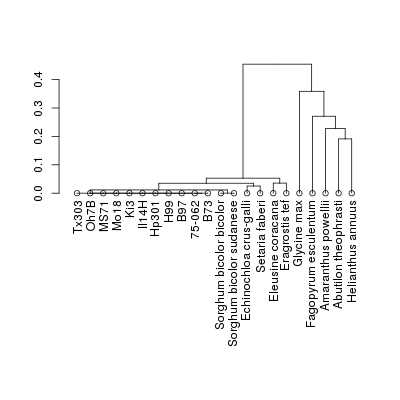

In [7]:
%%R -w 400 -h 400

# simplify, re-order matrix so that plants appear in same order as they are in the legend key.  then 
Mat = phy_expand
colnames(Mat) = c("Fagopyrum esculentum", "Amaranthus powellii", "Helianthus annuus", "Abutilon theophrasti",
                 "Glycine max", "Sorghum bicolor bicolor", "B73", "Echinochloa crus-galli", 
                  "Setaria faberi",  "Eragrostis tef","Eleusine coracana", "75-062", "Oh7B", "MS71", "B97",
                  "H99", "Il14H", "Ki3", "Tx303","Hp301", "Mo18", "Sorghum bicolor sudanese")
rownames(Mat) = c("Fagopyrum esculentum", "Amaranthus powellii", "Helianthus annuus", "Abutilon theophrasti",
                 "Glycine max", "Sorghum bicolor bicolor", "B73", "Echinochloa crus-galli", 
                  "Setaria faberi",  "Eragrostis tef","Eleusine coracana", "75-062", "Oh7B", "MS71", "B97",
                  "H99", "Il14H", "Ki3", "Tx303","Hp301", "Mo18", "Sorghum bicolor sudanese")

Mat = Mat[c("75-062", "B73", "B97" ,  "H99" , "Hp301",  "Il14H",  "Ki3" , "Mo18", "MS71","Oh7B", "Tx303",
             "Echinochloa crus-galli", "Setaria faberi", "Sorghum bicolor bicolor", "Sorghum bicolor sudanese",
            "Eleusine coracana", "Eragrostis tef", 
           "Abutilon theophrasti","Helianthus annuus","Fagopyrum esculentum", "Amaranthus powellii","Glycine max"),
         c("75-062", "B73", "B97" ,  "H99" , "Hp301",  "Il14H",  "Ki3" , "Mo18", "MS71","Oh7B", "Tx303",
             "Echinochloa crus-galli", "Setaria faberi", "Sorghum bicolor bicolor", "Sorghum bicolor sudanese",
            "Eleusine coracana", "Eragrostis tef", 
           "Abutilon theophrasti","Helianthus annuus","Fagopyrum esculentum", "Amaranthus powellii","Glycine max"),]

Phy_hc = hclust(as.dist(Mat), "complete")
hcd = as.dendrogram(Phy_hc)
# vector of colors to match CAP plot


labelColors = #c("#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
        #"#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
        #"#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")


# cut dendrogram in 4 clusters
clusMember = cutree(Phy_hc, 22)
#function to get color labels
colLab <- function(n) {
    if (is.leaf(n)) {
        a <- attributes(n)
        labCol <- labelColors[clusMember[which(names(clusMember) == a$label)]]
        attr(n, "nodePar") <- c(a$nodePar, lab.col = labCol)
    }
    n
}
# using dendrapply
clusDendro = dendrapply(hcd, colLab)
# make plot
par(mar=c(14,4.1,4.1,2.1))
plot(clusDendro, no.margin = TRUE)


# plot(Phy_hc, hang = -1)




In [8]:
%%R
rownames(Mat)

 [1] "75-062"                   "B73"                     
 [3] "B97"                      "H99"                     
 [5] "Hp301"                    "Il14H"                   
 [7] "Ki3"                      "Mo18"                    
 [9] "MS71"                     "Oh7B"                    
[11] "Tx303"                    "Echinochloa crus-galli"  
[13] "Setaria faberi"           "Sorghum bicolor bicolor" 
[15] "Sorghum bicolor sudanese" "Eleusine coracana"       
[17] "Eragrostis tef"           "Abutilon theophrasti"    
[19] "Helianthus annuus"        "Fagopyrum esculentum"    
[21] "Amaranthus powellii"      "Glycine max"             


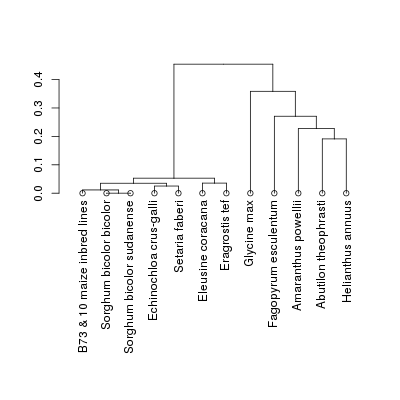

In [9]:
%%R -w 400 -h 400

# simplify, re-order matrix so that plants appear in same order as they are in the legend key.  then 
Mat = phy_expand
colnames(Mat) = c("Fagopyrum esculentum", "Amaranthus powellii", "Helianthus annuus", "Abutilon theophrasti",
                 "Glycine max", "Sorghum bicolor bicolor", "B73 & 10 maize inbred lines", "Echinochloa crus-galli", 
                  "Setaria faberi",  "Eragrostis tef","Eleusine coracana", "75-062", "Oh7B", "MS71", "B97",
                  "H99", "Il14H", "Ki3", "Tx303","Hp301", "Mo18", "Sorghum bicolor sudanense")
rownames(Mat) = c("Fagopyrum esculentum", "Amaranthus powellii", "Helianthus annuus", "Abutilon theophrasti",
                 "Glycine max", "Sorghum bicolor bicolor", "B73 & 10 maize inbred lines", "Echinochloa crus-galli", 
                  "Setaria faberi",  "Eragrostis tef","Eleusine coracana", "75-062", "Oh7B", "MS71", "B97",
                  "H99", "Il14H", "Ki3", "Tx303","Hp301", "Mo18", "Sorghum bicolor sudanense")

Mat = Mat[c("B73 & 10 maize inbred lines",
             "Echinochloa crus-galli", "Setaria faberi", "Sorghum bicolor bicolor", "Sorghum bicolor sudanense",
            "Eleusine coracana", "Eragrostis tef", 
           "Abutilon theophrasti","Helianthus annuus","Fagopyrum esculentum", "Amaranthus powellii","Glycine max"),
         c("B73 & 10 maize inbred lines", 
             "Echinochloa crus-galli", "Setaria faberi", "Sorghum bicolor bicolor", "Sorghum bicolor sudanense",
            "Eleusine coracana", "Eragrostis tef", 
           "Abutilon theophrasti","Helianthus annuus","Fagopyrum esculentum", "Amaranthus powellii","Glycine max"),]

Phy_hc = hclust(as.dist(Mat), "complete")
hcd = as.dendrogram(Phy_hc)
# vector of colors to match CAP plot


# labelColors = c("#1CE6FF", 
#         "#B79762", "#004D43", "#8FB0FF", "#997D87",
#         "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")

## Use this labelColors for colored tree with B73 representing all maize
# labelColors = c("#000000", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059",
#         "#FFDBE5", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
#         "#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80")

#Use this labelColors for just black
labelColors = "Black"
# #cut dendrogram in 12 clusters for colored figure 
#clusMember = cutree(Phy_hc, 12)
clusMember = cutree(Phy_hc, 1)
#function to get color labels
colLab <- function(n) {
    if (is.leaf(n)) {
        a <- attributes(n)
        labCol <- labelColors[clusMember[which(names(clusMember) == a$label)]]
        attr(n, "nodePar") <- c(a$nodePar, lab.col = labCol)
    }
    n
}
# using dendrapply
clusDendro = dendrapply(hcd, colLab)
# make plot
par(mar=c(14,4.1,4.1,2.1))
plot(clusDendro, no.margin = TRUE)


# plot(Phy_hc, hang = -1)




In [10]:
%%R
pdf(file = "/home/bryan/RhizCG/figures/plant_phylogeny.pdf", height = 5, width = 7)
par(mar=c(14,4.1,4.1,2.1))
plot(clusDendro, no.margin = TRUE)
dev.off()

png 
  2 


## Create melted dataframes for plot by plot comparisons

In [11]:
%%R
pd.m = melt(as.matrix(phy_expand))

#set column names and create comparison column
colnames(pd.m) = c("PlantA", "PlantB", "phy_Dist")
pd.m$PlantComp = paste(pd.m$PlantA, pd.m$PlantB, sep = "-")
pd.m 


    PlantA PlantB phy_Dist     PlantComp
1    FAGES  FAGES  0.00000   FAGES-FAGES
2    AMAPO  FAGES  0.23210   AMAPO-FAGES
3    HELAN  FAGES  0.25302   HELAN-FAGES
4    ABUTH  FAGES  0.27096   ABUTH-FAGES
5    GLYMA  FAGES  0.35879   GLYMA-FAGES
6    SORBI  FAGES  0.43476   SORBI-FAGES
7      B73  FAGES  0.43787     B73-FAGES
8    ECHCG  FAGES  0.43985   ECHCG-FAGES
9    SETFA  FAGES  0.43592   SETFA-FAGES
10   ERATE  FAGES  0.44622   ERATE-FAGES
11   ELCOR  FAGES  0.44745   ELCOR-FAGES
12  75-062  FAGES  0.43787  75-062-FAGES
13    Oh7B  FAGES  0.43787    Oh7B-FAGES
14    MS71  FAGES  0.43787    MS71-FAGES
15     B97  FAGES  0.43787     B97-FAGES
16     H99  FAGES  0.43787     H99-FAGES
17   Il14H  FAGES  0.43787   Il14H-FAGES
18     Ki3  FAGES  0.43787     Ki3-FAGES
19   Tx303  FAGES  0.43787   Tx303-FAGES
20   Hp301  FAGES  0.43787   Hp301-FAGES
21    Mo18  FAGES  0.43787    Mo18-FAGES
22  SORSUD  FAGES  0.43476  SORSUD-FAGES
23   FAGES  AMAPO  0.23210   FAGES-AMAPO
24   AMAPO  AMAP

In [12]:
%%R
#Read rarified phyloseq object
F = file.path('/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3_r')
physeq.Full = readRDS(F)

physeq.Npos = subset_samples(physeq.Full, Treatment == "Npos" & Plant != "BARE")
physeq.Npos = filter_taxa(physeq.Npos, function(x) sum(x > 0) > 0, TRUE)  
physeq.Npos

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4915 taxa and 87 samples ]
sample_data() Sample Data:       [ 87 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 4915 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4915 tips and 4914 internal nodes ]


# Overall dataset

In [13]:
%%R

phy = physeq.Npos

phy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4915 taxa and 87 samples ]
sample_data() Sample Data:       [ 87 samples by 55 sample variables ]
tax_table()   Taxonomy Table:    [ 4915 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4915 tips and 4914 internal nodes ]


In [14]:
%%R
registerDoParallel(cores=28)
phy.wunif.dist = distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)


# Data wrangling 

### Melt unifrac distances

In [15]:
%%R
ud = as.matrix(phy.wunif.dist) 
# remove lower triangle to remove duplicate values
ud[ lower.tri( ud, diag = TRUE ) ]  <- NA
head(ud)
ud.m = melt(ud, na.rm= TRUE)

# rename columns
colnames(ud.m) = c("PlotA", "PlotB", "w_Unif_Dist")
head(ud.m) %>% print
dim(ud.m) %>% print

                PlotA             PlotB w_Unif_Dist
88  sample6-4.12_Npos sample4-1.03_Npos   0.1882305
175 sample6-4.12_Npos sample5-2.06_Npos   0.1828480
176 sample4-1.03_Npos sample5-2.06_Npos   0.2140761
262 sample6-4.12_Npos sample5-4.08_Npos   0.1141642
263 sample4-1.03_Npos sample5-4.08_Npos   0.1765255
264 sample5-2.06_Npos sample5-4.08_Npos   0.1562777
[1] 3741    3


### Create seed size  variable

In [16]:
%%R
#add seed size
Plant = c("ERATE", "HELAN", "B73", "FAGES", "AMAPO", "SORSUD", "SORBI", 
          "ELCOR", "ECHCG", "ABUTH", "SETFA", "GLYMA", "MS71", "Mo18", "Il14H", "Tx303", "Oh7B",
         "B97", "Hp301", "75-062", "Ki3", "H99")
SeedSize_mg = c(.0035, 90, 333, 38, .49, 10.7, 32.39,
               3.2, 1.58, 9.6, 1.8, 174, 264, 224, 219, 279, 207,
               240, 87, 222, 228, 231)
SS = cbind(Plant, SeedSize_mg) %>% as.data.frame
head(SS) %>% print
SS$SeedSize_mg = SS$SeedSize_mg %>% as.character %>% as.numeric

## Create functional distance variables
sd = sample_data(phy)

# join seed size with sample data
sd = left_join(sd, SS, by = "Plant")
rownames(sd) = sd$X.sample
sample_data(phy) = sd

   Plant SeedSize_mg
1  ERATE      0.0035
2  HELAN          90
3    B73         333
4  FAGES          38
5  AMAPO        0.49
6 SORSUD        10.7


In [17]:
%%R
## Create functional distance variables
sd = sample_data(phy)


#measure distances on residCN
CNdist = dist(sd[,"A_Resid_logCN"], method = "euclidian")
    #melt matrix
    CN.m = melt(as.matrix(CNdist))

    #set column names and create comparison column
     colnames(CN.m) = c("PlotA", "PlotB", "CNdist")
    CN.m$PlotComp = paste(CN.m$PlotA, CN.m$PlotB, sep = "-")
    CN.m %>% head %>% print

#measure distances on residBiomass
Ndist = dist(sd[,"A_Resid_logN"], method = "euclidian")
    #melt matrix
    N.m = melt(as.matrix(Ndist))

    #set column names and create comparison column
     colnames(N.m) = c("PlotA", "PlotB", "Ndist")
    N.m$PlotComp = paste(N.m$PlotA, N.m$PlotB, sep = "-")
    N.m %>% head %>% print

#measure distances on Seed Size
SSdist = dist(log(sd[,"SeedSize_mg"]), method = "euclidian")
    #melt matrix
    SS.m = melt(as.matrix(SSdist))

    #set column names and create comparison column
     colnames(SS.m) = c("PlotA", "PlotB", "SSdist")
    SS.m$PlotComp = paste(SS.m$PlotA, SS.m$PlotB, sep = "-")
    SS.m %>% head %>% print


Fun.m = left_join(CN.m, N.m[,c(3,4)], by = "PlotComp")
Fun.m = left_join(Fun.m, SS.m[,c(3,4)], by = "PlotComp")
head(Fun.m)

              PlotA             PlotB     CNdist
1 sample6-4.12_Npos sample6-4.12_Npos 0.00000000
2 sample4-1.03_Npos sample6-4.12_Npos 0.41177210
3 sample5-2.06_Npos sample6-4.12_Npos 0.04615353
4 sample5-4.08_Npos sample6-4.12_Npos 0.16517881
5 sample5-4.28_Npos sample6-4.12_Npos 0.13452450
6 sample5-1.29_Npos sample6-4.12_Npos 0.66315079
                             PlotComp
1 sample6-4.12_Npos-sample6-4.12_Npos
2 sample4-1.03_Npos-sample6-4.12_Npos
3 sample5-2.06_Npos-sample6-4.12_Npos
4 sample5-4.08_Npos-sample6-4.12_Npos
5 sample5-4.28_Npos-sample6-4.12_Npos
6 sample5-1.29_Npos-sample6-4.12_Npos
              PlotA             PlotB      Ndist
1 sample6-4.12_Npos sample6-4.12_Npos 0.00000000
2 sample4-1.03_Npos sample6-4.12_Npos 0.85141994
3 sample5-2.06_Npos sample6-4.12_Npos 0.13103116
4 sample5-4.08_Npos sample6-4.12_Npos 0.20417648
5 sample5-4.28_Npos sample6-4.12_Npos 0.04383976
6 sample5-1.29_Npos sample6-4.12_Npos 0.40436218
                             PlotComp
1 sample6-

### Join distance tables

In [18]:
%%R
colnames(ud.m)

[1] "PlotA"       "PlotB"       "w_Unif_Dist"


In [19]:
%%R
colnames(sd)

 [1] "X.sample"            "Library"             "Primer_Plate"       
 [4] "Primer_Well_ID"      "primerFR_ID_byPlate" "primerFR_ID_total"  
 [7] "barcode_ID"          "PlotID"              "Plant"              
[10] "Plot"                "Treatment"           "Rep"                
[13] "DAP"                 "Sampling"            "PlantSample"        
[16] "Type"                "Grass_Broad"         "Status"             
[19] "Subfamily"           "fwd_barcode"         "rev_barcode"        
[22] "Planted"             "Biomass_P"           "SLA"                
[25] "Leaf_N"              "Leaf_C"              "LeafC_N"            
[28] "LNa"                 "Plant_N"             "Plant_C"            
[31] "Plant_CN"            "d15N"                "tN_p"               
[34] "BX_activity_g"       "CB_activity_g"       "LAP_activity_g"     
[37] "NAG_activity_g"      "BX_rel"              "CB_rel"             
[40] "LAP_rel"             "NAG_rel"             "NO3_ug_g"           
[43] "

In [20]:
%%R
#Add plant names to melted unifrac table
ud.m = left_join(ud.m, sd[, c(1,9)], by = c("PlotA" = "X.sample"))
head(ud.m) %>% print
colnames(ud.m)[4] = "PlantA"

ud.m = left_join(ud.m, sd[, c(1,9)], by = c("PlotB" = "X.sample"))
head(ud.m) %>% print
colnames(ud.m)[5] = "PlantB"
ud.m$PlantComp = paste(ud.m$PlantA, ud.m$PlantB, sep = "-")

#Create plot-plot variable for joining with functional distance matrix
ud.m$PlotComp = paste(ud.m$PlotA, ud.m$PlotB, sep = "-")
head(ud.m) %>% print

              PlotA             PlotB w_Unif_Dist Plant
1 sample6-4.12_Npos sample4-1.03_Npos   0.1882305  Oh7B
2 sample6-4.12_Npos sample5-2.06_Npos   0.1828480  Oh7B
3 sample4-1.03_Npos sample5-2.06_Npos   0.2140761 SETFA
4 sample6-4.12_Npos sample5-4.08_Npos   0.1141642  Oh7B
5 sample4-1.03_Npos sample5-4.08_Npos   0.1765255 SETFA
6 sample5-2.06_Npos sample5-4.08_Npos   0.1562777  MS71
              PlotA             PlotB w_Unif_Dist PlantA Plant
1 sample6-4.12_Npos sample4-1.03_Npos   0.1882305   Oh7B SETFA
2 sample6-4.12_Npos sample5-2.06_Npos   0.1828480   Oh7B  MS71
3 sample4-1.03_Npos sample5-2.06_Npos   0.2140761  SETFA  MS71
4 sample6-4.12_Npos sample5-4.08_Npos   0.1141642   Oh7B  MS71
5 sample4-1.03_Npos sample5-4.08_Npos   0.1765255  SETFA  MS71
6 sample5-2.06_Npos sample5-4.08_Npos   0.1562777   MS71  MS71
              PlotA             PlotB w_Unif_Dist PlantA PlantB  PlantComp
1 sample6-4.12_Npos sample4-1.03_Npos   0.1882305   Oh7B  SETFA Oh7B-SETFA
2 sample6-4.12_Np

### Join with plant phylogenetic distance and functional distance

In [21]:
%%R
colnames(Fun.m)

[1] "PlotA"    "PlotB"    "CNdist"   "PlotComp" "Ndist"    "SSdist"  


In [22]:
%%R
Dist = left_join(ud.m, pd.m[,c(3,4)], by = "PlantComp")
tail(Dist) %>% print

#Join with 
# Join DAP information and library information
Dist = left_join(Dist, sd[,c(1,2,13)], by = c("PlotA" = "X.sample"))
colnames(Dist)[9:10] = c("LibraryA","DAY_A")
tail(Dist) %>% print

Dist = left_join(Dist, sd[,c(1,2,13)], by = c("PlotB" = "X.sample"))
colnames(Dist)[11:12] = c("LibraryB","DAY_B")
tail(Dist) %>% print

Dist = left_join(Dist, Fun.m[,3:6], by = "PlotComp")

# set DAY_A and DAY_B as factor
Dist$DAY_A = as.factor(Dist$DAY_A)
Dist$DAY_B = as.factor(Dist$DAY_B)
Dist$TimeDist = abs(as.numeric(as.character(Dist$DAY_A)) - as.numeric(as.character(Dist$DAY_B)))

#create factor for cross library comps and same day comps
Dist$LibraryComp = ifelse(Dist$LibraryA == Dist$LibraryB, 0, 1) %>% as.factor
Dist$SameDay = ifelse(Dist$DAY_A == Dist$DAY_B, 0, 1) %>% as.factor

head(Dist)

                 PlotA             PlotB w_Unif_Dist PlantA PlantB PlantComp
3736 sample7-3.12_Npos sample8-2.25_Npos   0.1925278  HELAN    Ki3 HELAN-Ki3
3737 sample8-3.23_Npos sample8-2.25_Npos   0.1183894   Mo18    Ki3  Mo18-Ki3
3738 sample8-3.29_Npos sample8-2.25_Npos   0.1270028    Ki3    Ki3   Ki3-Ki3
3739 sample8-2.07_Npos sample8-2.25_Npos   0.2304260  ELCOR    Ki3 ELCOR-Ki3
3740 sample3-4.18_Npos sample8-2.25_Npos   0.2731942  ABUTH    Ki3 ABUTH-Ki3
3741 sample8-4.04_Npos sample8-2.25_Npos   0.1768487   Mo18    Ki3  Mo18-Ki3
                                PlotComp phy_Dist
3736 sample7-3.12_Npos-sample8-2.25_Npos  0.35807
3737 sample8-3.23_Npos-sample8-2.25_Npos  0.00020
3738 sample8-3.29_Npos-sample8-2.25_Npos  0.00000
3739 sample8-2.07_Npos-sample8-2.25_Npos  0.05090
3740 sample3-4.18_Npos-sample8-2.25_Npos  0.35681
3741 sample8-4.04_Npos-sample8-2.25_Npos  0.00020
                 PlotA             PlotB w_Unif_Dist PlantA PlantB PlantComp
3736 sample7-3.12_Npos sample8-2.2

# Build corMLPE models

## Subset dist object to just B73 and annuals

In [23]:
%%R
dim(Dist) %>% print
FullDist = Dist #save for levels of variation figure
Dist = filter(Dist, PlantA %in% c("SETFA", "FAGES",  "B73" ,   "AMAPO",  "GLYMA",    
                          "ERATE",  "ELCOR",  "SORSUD",     "SORBI",  "ABUTH",  "HELAN",  "ECHCG" ) & 
              PlantB %in% c("SETFA", "FAGES",  "B73" ,   "AMAPO",  "GLYMA",    
                  "ERATE",  "ELCOR",  "SORSUD",     "SORBI",  "ABUTH",  "HELAN",  "ECHCG" ))
dim(Dist)

[1] 3741   18
[1] 1081   18


### Null model

In [24]:
%%R
#Null model
fit1 =  gls(w_Unif_Dist ~ 1, correlation = corMLPE(form= ~ PlotA + PlotB), data = Dist)


In [25]:
%%R
summary(fit1)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ 1 
  Data: Dist 
        AIC       BIC   logLik
  -3077.071 -3062.117 1541.536

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.2589357 

Coefficients:
                Value  Std.Error  t-value p-value
(Intercept) 0.2874911 0.01166762 24.64006       0

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.40284202 -0.70562879 -0.04548944  0.63318279  4.08115452 

Residual standard error: 0.07781343 
Degrees of freedom: 1081 total; 1080 residual


### Time distance

In [26]:
%%R
fit2 =  gls(w_Unif_Dist ~ poly(TimeDist,2), 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = Dist)
summary(fit2)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ poly(TimeDist, 2) 
  Data: Dist 
        AIC       BIC   logLik
  -3299.496 -3274.582 1654.748

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.2950337 

Coefficients:
                        Value  Std.Error   t-value p-value
(Intercept)         0.2874911 0.01202608 23.905641       0
poly(TimeDist, 2)1  0.7229663 0.05606937 12.894141       0
poly(TimeDist, 2)2 -0.3667548 0.05587723 -6.563583       0

 Correlation: 
                   (Intr) p(TD,2)1
poly(TimeDist, 2)1 0.000          
poly(TimeDist, 2)2 0.000  0.234   

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.2237532 -0.6825101 -0.1171125  0.5397989  3.9128967 

Residual standard error: 0.07532724 
Degrees of freedom: 1081 total; 1078 residual


In [27]:
%%R
# for unscaled time coefficients

fit4.1 =  gls(w_Unif_Dist ~ I(TimeDist) + I(TimeDist^2), data = Dist)
summary(fit4.1)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ I(TimeDist) + I(TimeDist^2) 
  Data: Dist 
        AIC       BIC   logLik
  -2502.884 -2482.953 1255.442

Coefficients:
                    Value   Std.Error  t-value p-value
(Intercept)    0.25155083 0.004552775 55.25220       0
I(TimeDist)    0.00363575 0.000480081  7.57319       0
I(TimeDist^2) -0.00005759 0.000010663 -5.40105       0

 Correlation: 
              (Intr) I(TmD)
I(TimeDist)   -0.763       
I(TimeDist^2)  0.577 -0.941

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.16297842 -0.71474336 -0.09461575  0.56628469  4.00581561 

Residual standard error: 0.07422375 
Degrees of freedom: 1081 total; 1078 residual


### Growth characteristics

In [28]:
%%R
fit3 =  gls(w_Unif_Dist ~  SSdist + CNdist, 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = Dist)
summary(fit3)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ SSdist + CNdist 
  Data: Dist 
        AIC       BIC   logLik
  -3089.175 -3064.261 1549.588

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.2710362 

Coefficients:
                 Value  Std.Error   t-value p-value
(Intercept) 0.26994847 0.01270585 21.246002  0.0000
SSdist      0.00519037 0.00086173  6.023203  0.0000
CNdist      0.00193506 0.01090491  0.177448  0.8592

 Correlation: 
       (Intr) SSdist
SSdist -0.224       
CNdist -0.234  0.006

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.18868933 -0.72342168 -0.06017009  0.63995822  4.08519343 

Residual standard error: 0.07845519 
Degrees of freedom: 1081 total; 1078 residual


In [29]:
%%R
# Ndist tested and not significant
fit6 =  gls(w_Unif_Dist ~ poly(TimeDist,2) + SSdist + CNdist, 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = Dist)

In [30]:
%%R
summary(fit6)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ poly(TimeDist, 2) + SSdist + CNdist 
  Data: Dist 
        AIC       BIC   logLik
  -3288.854 -3253.987 1651.427

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.2990751 

Coefficients:
                        Value  Std.Error   t-value p-value
(Intercept)         0.2773242 0.01273475 21.776960  0.0000
poly(TimeDist, 2)1  0.7151017 0.05579988 12.815470  0.0000
poly(TimeDist, 2)2 -0.3123088 0.05753655 -5.428006  0.0000
SSdist              0.0029569 0.00081373  3.633804  0.0003
CNdist              0.0017395 0.00987968  0.176072  0.8603

 Correlation: 
                   (Intr) p(TD,2)1 p(TD,2)2 SSdist
poly(TimeDist, 2)1  0.007                         
poly(TimeDist, 2)2 -0.057  0.215                  
SSdist             -0.211 -0.040    0.260         
CNdist             -0.212  0.006    0.012    0.009

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-

### Phylogenetic Distance

In [31]:
%%R
fit4 =  gls(w_Unif_Dist ~ poly(phy_Dist,2), 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = Dist)
summary(fit4)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ poly(phy_Dist, 2) 
  Data: Dist 
        AIC       BIC   logLik
  -3179.252 -3154.337 1594.626

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
    Rho 
0.28918 

Coefficients:
                        Value  Std.Error   t-value p-value
(Intercept)         0.2874911 0.01243352 23.122262       0
poly(phy_Dist, 2)1  0.5222301 0.06431727  8.119594       0
poly(phy_Dist, 2)2 -0.7018841 0.07496171 -9.363234       0

 Correlation: 
                   (Intr) p(_D,2)1
poly(phy_Dist, 2)1  0.00          
poly(phy_Dist, 2)2  0.00  -0.28   

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.2474983 -0.7351510 -0.0220829  0.6417427  4.1371330 

Residual standard error: 0.07863472 
Degrees of freedom: 1081 total; 1078 residual


In [50]:
%%R
str(fit1)

List of 16
 $ modelStruct :List of 1
  ..$ corStruct:Classes 'corMLPE', 'corStruct'  atomic [1:1] 0.0715
  .. .. ..- attr(*, "formula")=Class 'formula'  language ~PlotA + PlotB
  .. .. .. .. ..- attr(*, ".Environment")=<environment: R_GlobalEnv> 
  .. .. ..- attr(*, "fixed")= logi FALSE
  .. .. ..- attr(*, "Dim")=List of 6
  .. .. .. ..$ N       : int 1081
  .. .. .. ..$ M       : int 1
  .. .. .. ..$ maxLen  : int 1081
  .. .. .. ..$ sumLenSq: num 1168561
  .. .. .. ..$ len     : 'table' int [1(1d)] 1081
  .. .. .. .. ..- attr(*, "dimnames")=List of 1
  .. .. .. .. .. ..$ groups: chr "1"
  .. .. .. ..$ start   : int 0
  .. .. ..- attr(*, "covariate")=List of 1
  .. .. .. ..$ :List of 1081
  .. .. .. .. ..$ : Named chr [1:2] "sample4-1.03_Npos" "sample5-1.29_Npos"
  .. .. .. .. .. ..- attr(*, "names")= chr [1:2] "p1" "p2"
  .. .. .. .. ..$ : Named chr [1:2] "sample4-1.03_Npos" "sample1-3.08_Npos"
  .. .. .. .. .. ..- attr(*, "names")= chr [1:2] "p1" "p2"
  .. .. .. .. ..$ : Named chr [

In [32]:
%%R
## For unscaled coefficients
fit4.1 =  gls(w_Unif_Dist ~ I(phy_Dist) + I(phy_Dist^2), data = Dist)
summary(fit4.1)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ I(phy_Dist) + I(phy_Dist^2) 
  Data: Dist 
        AIC       BIC  logLik
  -2477.881 -2457.949 1242.94

Coefficients:
                   Value  Std.Error  t-value p-value
(Intercept)    0.2651129 0.00485030 54.65909  0.0000
I(phy_Dist)    0.2437299 0.06629089  3.67667  0.0002
I(phy_Dist^2) -0.4181508 0.14766668 -2.83172  0.0047

 Correlation: 
              (Intr) I(p_D)
I(phy_Dist)   -0.674       
I(phy_Dist^2)  0.546 -0.979

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.16389530 -0.75563109 -0.03016162  0.65427723  4.12612391 

Residual standard error: 0.07606431 
Degrees of freedom: 1081 total; 1078 residual


### Best fit model

In [34]:
%%R
fit5 =  gls(w_Unif_Dist ~ poly(TimeDist, 2) + poly(phy_Dist,2), 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = Dist)
summary(fit5)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ poly(TimeDist, 2) + poly(phy_Dist, 2) 
  Data: Dist 
        AIC       BIC   logLik
  -3344.231 -3309.364 1679.115

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.3093634 

Coefficients:
                        Value  Std.Error   t-value p-value
(Intercept)         0.2874911 0.01241246 23.161493  0.0000
poly(TimeDist, 2)1  0.6971021 0.05857254 11.901516  0.0000
poly(TimeDist, 2)2 -0.2470184 0.05677681 -4.350692  0.0000
poly(phy_Dist, 2)1  0.2001869 0.06382694  3.136401  0.0018
poly(phy_Dist, 2)2 -0.5441486 0.07230747 -7.525483  0.0000

 Correlation: 
                   (Intr) p(TD,2)1 p(TD,2)2 p(_D,2)1
poly(TimeDist, 2)1  0.000                           
poly(TimeDist, 2)2  0.000  0.218                    
poly(phy_Dist, 2)1  0.000 -0.350    0.049           
poly(phy_Dist, 2)2  0.000  0.014   -0.284   -0.293  

Standardized residuals:
       Min         Q1        Med         Q3  

In [35]:
%%R
fit7 =  gls(w_Unif_Dist ~ poly(TimeDist,2) + poly(phy_Dist,2) + SSdist + CNdist, 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = Dist)

In [36]:
%%R
summary(fit7)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ poly(TimeDist, 2) + poly(phy_Dist, 2) + SSdist +      CNdist 
  Data: Dist 
        AIC       BIC   logLik
  -3326.809 -3281.997 1672.404

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.3099494 

Coefficients:
                        Value  Std.Error   t-value p-value
(Intercept)         0.2809002 0.01298678 21.629709  0.0000
poly(TimeDist, 2)1  0.7001964 0.05851582 11.965934  0.0000
poly(TimeDist, 2)2 -0.2145727 0.05809433 -3.693521  0.0002
poly(phy_Dist, 2)1  0.1685740 0.06529527  2.581719  0.0100
poly(phy_Dist, 2)2 -0.5169800 0.07299702 -7.082207  0.0000
SSdist              0.0020606 0.00081530  2.527449  0.0116
CNdist             -0.0006083 0.00971039 -0.062648  0.9501

 Correlation: 
                   (Intr) p(TD,2)1 p(TD,2)2 p(_D,2)1 p(_D,2)2 SSdist
poly(TimeDist, 2)1 -0.013                                           
poly(TimeDist, 2)2 -0.048  0.218                        

### Calculating R2

In [64]:
%%R
rB.1 = lm(Dist$w_Unif_Dist~fitted(fitB.1))
summary(rB.1)


Call:
lm(formula = Dist$w_Unif_Dist ~ fitted(fitB.1))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.14879 -0.04806 -0.01011  0.03985  0.28331 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.03099    0.01182   2.621  0.00881 ** 
fitted(fitB.1)  0.87622    0.04704  18.629  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0653 on 3739 degrees of freedom
Multiple R-squared:  0.08493,	Adjusted R-squared:  0.08469 
F-statistic:   347 on 1 and 3739 DF,  p-value: < 2.2e-16



In [600]:
%%R
anova(fit1, fit2, fit3, fit4, fit5, fit6, fit7, fit8, fit9)


Error in nlme::anova.lme(object = fit1, fit2, fit3, fit4, fit5, fit6,  : 
  all fitted objects must use the same number of observations


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: In nlme::anova.lme(object = fit1, fit2, fit3, fit4, fit5, fit6,  :
  res = super(Function, self).__call__(*new_args, **new_kwargs)


Notes: Phylogenetic distance^2 and time make the best model on the overall dataset of annuals plus B73

## Graphs

### phylogenetic distance vs microbial community

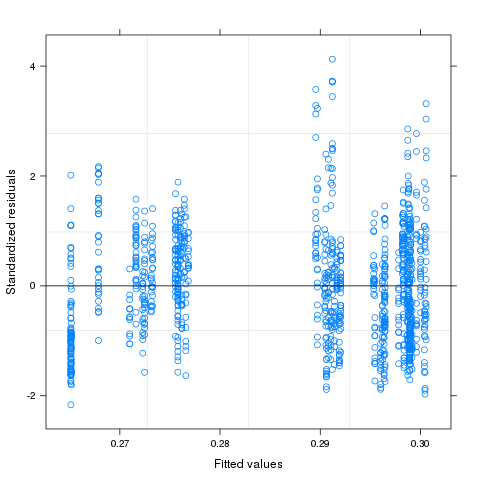

In [43]:
%%R
# check residuals
plot(fit4.1)

In [41]:
%%R
coef(fit4.1) %>% print
confint(fit4.1)

  (Intercept)   I(phy_Dist) I(phy_Dist^2) 
    0.2651129     0.2437299    -0.4181508 
                   2.5 %     97.5 %
(Intercept)    0.2556064  0.2746193
I(phy_Dist)    0.1138021  0.3736576
I(phy_Dist^2) -0.7075722 -0.1287294


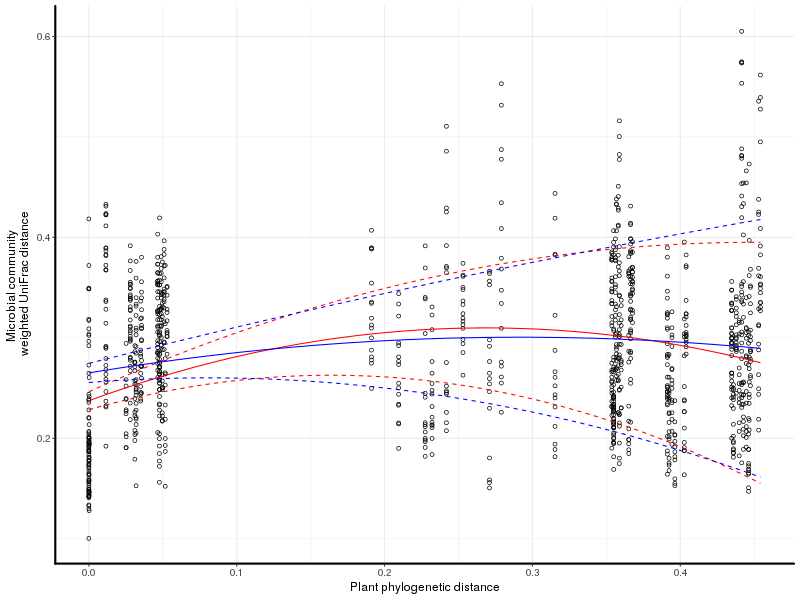

In [42]:
%%R -w 800 -h 600

#line for Npositive samples
np.line <- function(x) {-0.4181508*x ^ 2 + 0.2437299*x + 0.2651129}
np.CImin <- function(x) {-0.7076*x ^ 2 + 0.114*x + .2556}
np.CImax <- function(x) {-.1287*x ^ 2 + .37366*x + .2746193}


# fit line for Nneg samples and 95% confidence interval
test <- function(x) {-1.005*x ^ 2 + .5399*x + .2374}
test.CImin <- function(x) {-1.27604*x ^ 2 + .41847*x + .2285}
test.CImax <- function(x) {-.73501*x ^ 2 + .66135*x + .24633}

p = ggplot(Dist, aes(y = w_Unif_Dist, x = phy_Dist)) 
p = p + geom_point(pch = 21) #aes(size = phy_Dist), shape = 1)
#p = p + stat_smooth(method = "lm", se = FALSE)
p = p + theme_bw(base_size = 12)
p = p + theme(panel.border = element_blank()) 
p = p + theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_line(color="black", size = 1))

# line for Nneg samples in red
p = p + stat_function(fun = test, color = "red")
p = p + stat_function(fun = test.CImin, linetype = "dashed",  color = "red")
p = p + stat_function(fun = test.CImax, linetype = "dashed", color = "red")

# line for Npos samples in blue
p = p + stat_function(fun = np.line, color = "blue")
p = p + stat_function(fun = np.CImin, linetype = "dashed",  color = "blue")
p = p + stat_function(fun = np.CImax, linetype = "dashed", color = "blue")



# p = p + stat_smooth(method = "lm", se = FALSE)
p = p + labs(x = "Plant phylogenetic distance")
p = p + labs(y = "Microbial community \n weighted UniFrac distance")
p

### levels of variability

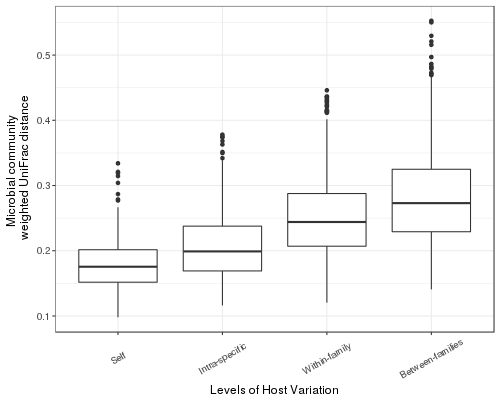

In [181]:
%%R -w 500 -h 400
p2 = FullDist %>%
    mutate(Related = ifelse(phy_Dist == 0, "Self",
               ifelse(phy_Dist == 0.0002, "Intra-specific", #"Interspecific"))) %>%
                ifelse(phy_Dist < 0.1, "Within-family", "Between-families")))) %>%


    mutate(Related = factor(Related, c("Self","Intra-specific", "Within-family", "Between-families" ))) %>%

 ggplot(aes(x = Related, y = w_Unif_Dist))  +
       geom_boxplot() +

#         ylab("Weighted UniFrac") +
        #ggtitle("Intra- and Interspecific Variation") +
        theme_bw(base_size = 12)+
        labs(y = "Microbial community \n weighted UniFrac distance") +
    
       # theme(axis.title.x = element_blank()) +
       # theme(axis.title.y = element_blank()) +
        theme(legend.position="none", axis.text.x = element_text(angle = 30, vjust = .5))+ 
        xlab("Levels of Host Variation")
p2

In [102]:
%%R
# coeficents and CI for time
coef(fit4.1) %>% print
confint(fit4.1)

  (Intercept)   I(TimeDist) I(TimeDist^2) 
 2.290861e-01  4.525497e-03 -6.031133e-05 
                      2.5 %        97.5 %
(Intercept)    2.208687e-01  2.373035e-01
I(TimeDist)    3.658988e-03  5.392005e-03
I(TimeDist^2) -7.955666e-05 -4.106601e-05


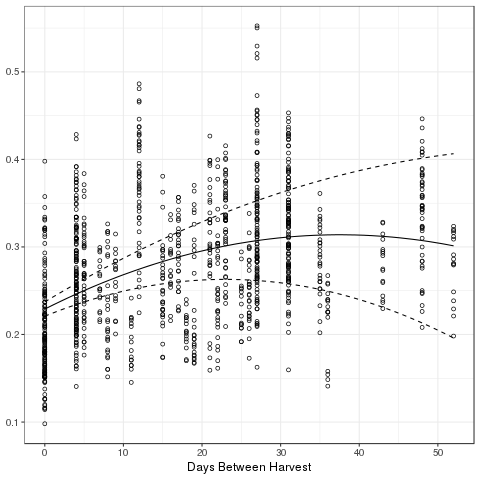

In [189]:
%%R
# Time distance
fl <- function(x) {-0.000060311*x^2 + .004525*x + .22908}
fl.CImin <- function(x) {-0.00007956*x^2 + .003659*x + .2209}
fl.CImax <- function(x) {-0.00004107*x^2 + .00539*x + .2373}

p1 = ggplot(Dist, aes(y = w_Unif_Dist, x = TimeDist)) 
p1 = p1 + geom_point(pch = 21) #aes(size = phy_Dist), shape = 1)
p1 = p1 + theme_bw(base_size = 12)
#p1 = p1 + ggtitle("Time")
p1 = p1 + stat_function(fun = fl)
p1 = p1 + stat_function(fun = fl.CImin, linetype = "dashed")
p1 = p1 + stat_function(fun = fl.CImax, linetype = "dashed")

p1 = p1 + labs(x = "Days Between Harvest")
p1 = p1 + labs(y = "Microbial community \n weighted UniFrac distance") 
p1 = p1 + theme(axis.title.y = element_blank())
#p1 = p1 + labs(y = "Weighted UniFrac distance")
p1


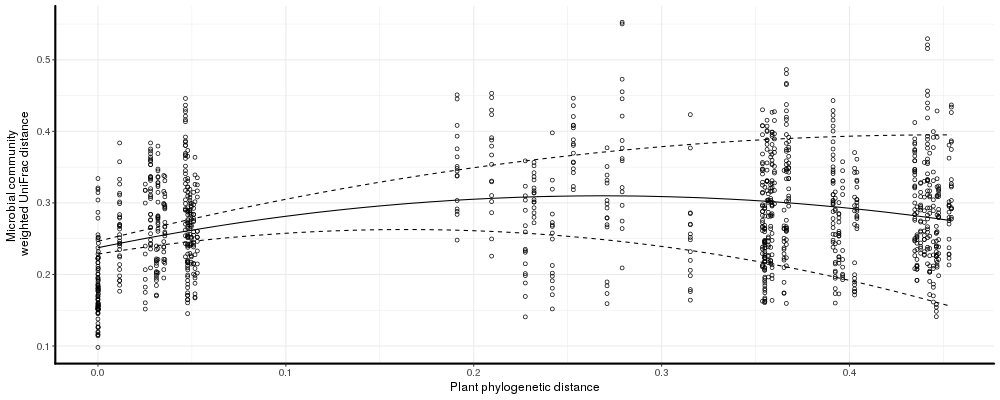

In [197]:
%%R -w 1000 -h 400
p


## Graph of otus showing different trends

In [135]:
%%R
phy.sub = transform_sample_counts(phy, function(x) x/sum(x)) %>%
             prune_taxa(c("OTU.6", "OTU.3", "OTU.53", "OTU.9501", "OTU.256", "OTU.197"),.)
phy.sub


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 6 taxa and 87 samples ]
sample_data() Sample Data:       [ 87 samples by 56 sample variables ]
tax_table()   Taxonomy Table:    [ 6 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 6 tips and 5 internal nodes ]


In [138]:
%%R

mdf = psmelt(phy.sub)


In [110]:
%%R
# # phy
# sample_data(phy.sub)$DAP = as.factor(sample_data(phy.sub)$DAP)
# dds = phyloseq_to_deseq2(phy.sub, ~DAP)
# d_dds = DESeq2::DESeq(dds, parallel = TRUE)

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: Loading required namespace: DESeq2

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: converting counts to integer mode

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: estimating size factors

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: estimating dispersions

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: gene-wise dispersion estimates: 38 workers

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:185: RRuntimeWarning: mean-dispersion relationship

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/sit

In [111]:
%%R -w 800 -h 1000
# #Tinfo = as(tax_table(phy.sub), "matrix")
# p5 <- list()
# T = c("OTU.6", "OTU.3", "OTU.53")
# for (i in T){
#   d = DESeq2::plotCounts(dds, gene=i, intgroup=c("DAP", "Type"), returnData = TRUE)  
# p[[i]] = ggplot(d, aes(x=DAP, y=count, color = Type)) +
#   geom_point(position=position_jitter(w=0.1,h=0)) +
#   theme(legend.position="none")
#     #ggtitle(paste(i, "\n", Tinfo[i, 2], "\n", Tinfo[i, 6], sep = ""))
#   }

# #legend = get_legend(p[1])
# #do.call(grid.arrange,p5)
# #

In [112]:
%%R
# phy.sub %>% tax_table

Taxonomy Table:     [6 taxa by 8 taxonomic ranks]:
         Rank1      Rank2            Rank3                
OTU.53   "Bacteria" "Proteobacteria" "Gammaproteobacteria"
OTU.9501 "Bacteria" "Proteobacteria" "Betaproteobacteria" 
OTU.256  "Bacteria" "Proteobacteria" "Deltaproteobacteria"
OTU.197  "Bacteria" "Actinobacteria" "Streptomycetales"   
OTU.3    "Bacteria" "Actinobacteria" "Streptomycetales"   
OTU.6    "Bacteria" "Actinobacteria" "MB-A2-108"          
         Rank4                  Rank5             Rank6          
OTU.53   "Xanthomonadales"      "Sinobacteraceae" "uncultured"   
OTU.9501 "Burkholderiales"      "Comamonadaceae"  NA             
OTU.256  "Myxococcales"         "Nannocystineae"  "Haliangiaceae"
OTU.197  "Streptomycetaceae"    "Streptomyces"    NA             
OTU.3    "Streptomycetaceae"    "Streptomyces"    NA             
OTU.6    "uncultured_bacterium" NA                NA             
         Rank7                  Rank8                 
OTU.53   "unculture

In [139]:
%%R
head(mdf)

      OTU            Sample  Abundance          X.sample Library Primer_Plate
209 OTU.3 sample5-3.13_Nneg 0.13970736 sample5-3.13_Nneg       1            2
256 OTU.3 sample6-1.12_Nneg 0.10442975 sample6-1.12_Nneg       1            2
214 OTU.3 sample5-3.27_Nneg 0.06213670 sample5-3.27_Nneg       1            1
232 OTU.3 sample5-4.08_Nneg 0.06053317 sample5-4.08_Nneg       1            2
242 OTU.3 sample8-4.04_Nneg 0.05993185 sample8-4.04_Nneg       2            1
195 OTU.3 sample6-3.18_Nneg 0.04990980 sample6-3.18_Nneg       1            2
    Primer_Well_ID primerFR_ID_byPlate primerFR_ID_total barcode_ID    PlotID
209             E1                   5               101        101 3.13_Nneg
256             A7                  49               145        145 1.12_Nneg
214             E4                  29                29         29 3.27_Nneg
232             G1                   7               103        103 4.08_Nneg
242            G11                  87                87        

In [192]:
%%R
O.3 = filter(mdf, OTU == "OTU.3") %>%
        ggplot(aes(x=DAP, y=Abundance, color = Type)) +
  geom_point(position=position_jitter(w=0.1,h=0)) +
    theme_bw(base_size = 12)+
    #scale_y_log10() +
    ggtitle("Streptomyces sp. A")
 
O.3
O.197 = filter(mdf, OTU == "OTU.197") %>%
        ggplot(aes(x=DAP, y=Abundance, color = Type)) +
  geom_point(position=position_jitter(w=0.1,h=0)) +
    theme_bw(base_size = 12)+
    #scale_y_log10() +
    ggtitle("Streptomyces sp. B") 

O.197

g_legend<-function(a.gplot){
    tmp <- ggplot_gtable(ggplot_build(a.gplot))
    leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
    legend <- tmp$grobs[[leg]]
    legend
}

legend1 <- g_legend(O.197)

                     
O.197 =  O.197 + theme(legend.position = 'none')
O.3 =  O.3 + theme(legend.position = 'none')
                        



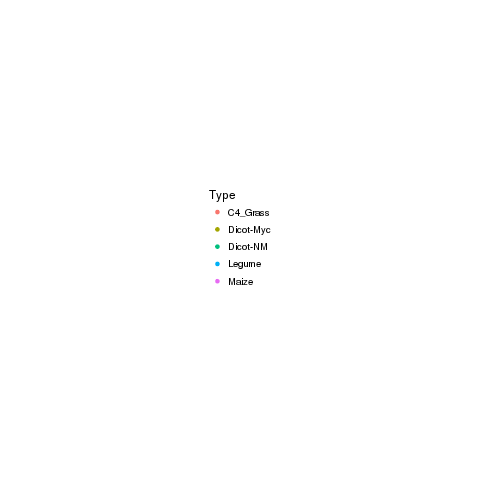

In [194]:
%%R
require("grid")
grid.draw(legend1) # draws legend
#grid.draw(ggplotGrob(legend1)) # does not draw, throws error because it is already a grob
p3 = arrangeGrob(rbind(ggplotGrob(O.3), ggplotGrob(O.197), size = "first"),legend1, ncol = 2, widths = c(2.5, .5))

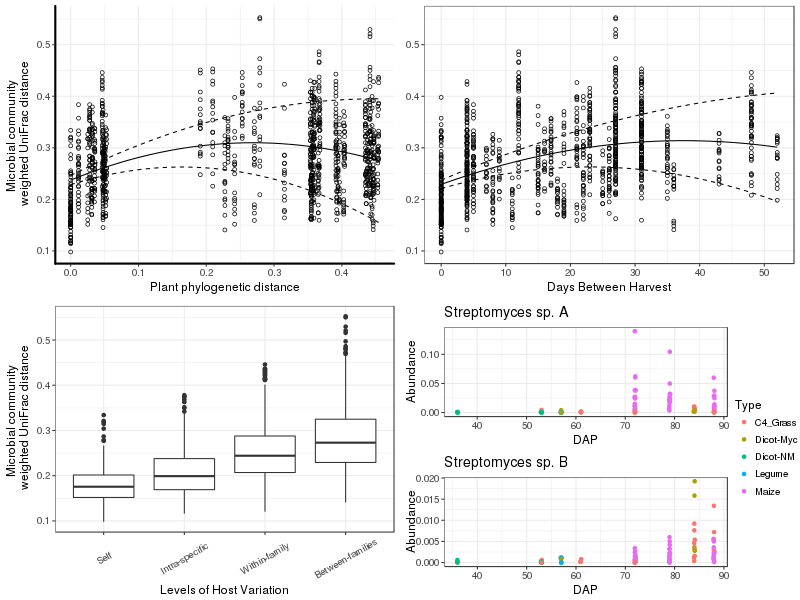

In [195]:
%%R -w 800 -h 600
grid.arrange(p,p1,p2,p3, ncol = 2)

In [166]:
%%R
# ggplotGrob converts O.3 to gtabe
#legend1 is a gtable with 2 grobs, layut
#str(legend1)
str(ggplotGrob(O.3))

gtable, containing 
grobs (17) : chr [1:17] "rect[plot.background..rect.4295]" "zeroGrob[NULL]" ...
layout :
'data.frame':	17 obs. of  7 variables:
 $ t   : num  1 5 6 7 5 6 7 5 6 7 ...
 $ l   : num  1 3 3 3 4 4 4 5 5 5 ...
 $ b   : num  10 5 6 7 5 6 7 5 6 7 ...
 $ r   : num  7 3 3 3 4 4 4 5 5 5 ...
 $ z   : num  0 5 7 3 6 1 9 4 8 2 ...
 $ clip: chr  "on" "off" "off" "off" ...
 $ name: chr  "background" "spacer" "axis-l" "spacer" ...
widths :
unit vector of length 7 
heights :
unit vector of length 10 
respect :
 logi FALSE
rownames :
 NULL
name :
 chr "layout"
gp :
 NULL
vp :
 NULL


In [143]:
%%R
# d = DESeq2::plotCounts(dds, gene="OTU.3", intgroup=c("DAP", "Type"), returnData = TRUE)  
O.3 = filter(mdf, OTU == "OTU.3") %>%
        ggplot(., aes(x=DAP, y=count, color = Type)) +
  geom_point(position=position_jitter(w=0.1,h=0)) +
    theme_bw(base_size = 12)+
    scale_y_log10() +
    ggtitle("Streptomyces sp. A") +
  theme(legend.position="none") +
theme(axis.title.x = element_blank()) 


#d = DESeq2::plotCounts(dds, gene="OTU.197", intgroup=c("DAP", "Type"), returnData = TRUE)  
O.197 = filter(mdf, OTU == "OTU.197") %>%
        ggplot(., aes(x=DAP, y=count, color = Type)) +
  geom_point(position=position_jitter(w=0.1,h=0)) +
    theme_bw(base_size = 12)+
    #scale_y_log10() +
  #theme(legend.position="none") +
    ggtitle("Streptomyces sp. B") 
   # ylim(0,100)

g_legend<-function(a.gplot){
    tmp <- ggplot_gtable(ggplot_build(a.gplot))
    leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
    legend <- tmp$grobs[[leg]]
    legend
}

legend1 <- g_legend(O.197)

                     
O.197 =  O.197 + theme(legend.position = 'none')
O.3 =  O.3 + theme(legend.position = 'none')


# p5 = grid.arrange(O.3, O.53,legend1, layout_matrix = cbind(c(1,2), c(3,3)),
#             widths = c(2.7, 1), heights = c(.2, 0.25))
require("grid")
GD = grid.draw(rbind(ggplotGrob(O.3), ggplotGrob(O.197), size="first"))


Error in (function (..., row.names = NULL, check.rows = FALSE, check.names = TRUE,  : 
  arguments imply differing number of rows: 87, 0


In [122]:
%%R



Error in tmp$grobs[[leg]] : 
  attempt to select less than one element in get1index


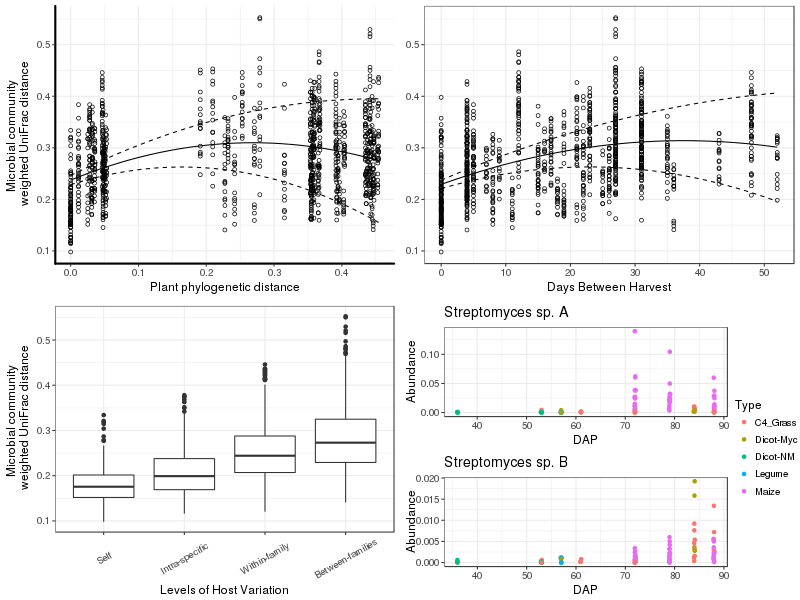

In [199]:
%%R -w 800 -h 600
grid.arrange(p,p1,p2,p3, ncol = 2)#layout_matrix = rbind(c(1, 1), c(2,3)))

# GLS if self comparisons are removed

In [36]:
%%R
dim(Dist) %>% print
SubDist = filter(Dist, phy_Dist > 0.000)
dim(SubDist)

[1] 1081   18
[1] 1012   18


In [37]:
%%R

fit_DS_t =  gls(w_Unif_Dist ~ TimeDist, 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = SubDist)
summary(fit_DS_t)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ TimeDist 
  Data: SubDist 
        AIC       BIC   logLik
  -3035.746 -3016.075 1521.873

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.2470841 

Coefficients:
                 Value   Std.Error  t-value p-value
(Intercept) 0.25126637 0.010555332 23.80469       0
TimeDist    0.00179285 0.000135778 13.20422       0

 Correlation: 
         (Intr)
TimeDist -0.25 

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.50880604 -0.74597678 -0.08745218  0.62677059  3.63047794 

Residual standard error: 0.0696574 
Degrees of freedom: 1012 total; 1010 residual


In [38]:
%%R

fit_DS_tt =  gls(w_Unif_Dist ~ I(TimeDist) + I(TimeDist^2), 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = SubDist)
summary(fit_DS_tt)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ I(TimeDist) + I(TimeDist^2) 
  Data: SubDist 
        AIC       BIC   logLik
  -3073.452 -3048.868 1541.726

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.2613125 

Coefficients:
                    Value   Std.Error   t-value p-value
(Intercept)    0.23665277 0.010925124 21.661334       0
I(TimeDist)    0.00450412 0.000365086 12.337155       0
I(TimeDist^2) -0.00006798 0.000008544 -7.956546       0

 Correlation: 
              (Intr) I(TmD)
I(TimeDist)   -0.241       
I(TimeDist^2)  0.168 -0.933

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.44355764 -0.72582161 -0.07136948  0.62644651  3.51250052 

Residual standard error: 0.06942555 
Degrees of freedom: 1012 total; 1009 residual


In [39]:
%%R

fit_DS_p =  gls(w_Unif_Dist ~ I(phy_Dist) + I(phy_Dist^2), 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = SubDist)
summary(fit_DS_p)


Generalized least squares fit by REML
  Model: w_Unif_Dist ~ I(phy_Dist) + I(phy_Dist^2) 
  Data: SubDist 
        AIC      BIC   logLik
  -2889.844 -2865.26 1449.922

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.2185903 

Coefficients:
                   Value  Std.Error   t-value p-value
(Intercept)    0.2631566 0.01340591 19.629889  0.0000
I(phy_Dist)    0.3489958 0.12293949  2.838761  0.0046
I(phy_Dist^2) -0.7147350 0.24753619 -2.887396  0.0040

 Correlation: 
              (Intr) I(p_D)
I(phy_Dist)   -0.644       
I(phy_Dist^2)  0.619 -0.994

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.30297444 -0.72540747 -0.02994498  0.66922444  3.51441666 

Residual standard error: 0.07158533 
Degrees of freedom: 1012 total; 1009 residual


In [40]:
%%R

fit_DS_tp =  gls(w_Unif_Dist ~ I(TimeDist) + I(TimeDist^2) + I(phy_Dist) + I(phy_Dist^2), 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = SubDist)


In [41]:
%%R
summary(fit_DS_tp)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ I(TimeDist) + I(TimeDist^2) + I(phy_Dist) + I(phy_Dist^2) 
  Data: SubDist 
        AIC       BIC   logLik
  -3083.696 -3049.293 1548.848

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.2565295 

Coefficients:
                   Value  Std.Error   t-value p-value
(Intercept)    0.2106144 0.01357127 15.519134   0e+00
I(TimeDist)    0.0043385 0.00036346 11.936755   0e+00
I(TimeDist^2) -0.0000601 0.00000865 -6.952316   0e+00
I(phy_Dist)    0.4514068 0.11545429  3.909831   1e-04
I(phy_Dist^2) -0.9738091 0.23323423 -4.175241   0e+00

 Correlation: 
              (Intr) I(TmD) I(TD^2 I(p_D)
I(TimeDist)   -0.167                     
I(TimeDist^2)  0.091 -0.929              
I(phy_Dist)   -0.600 -0.062  0.113       
I(phy_Dist^2)  0.580  0.069 -0.130 -0.994

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.44909055 -0.72727613 -0.07675512  0.6148334

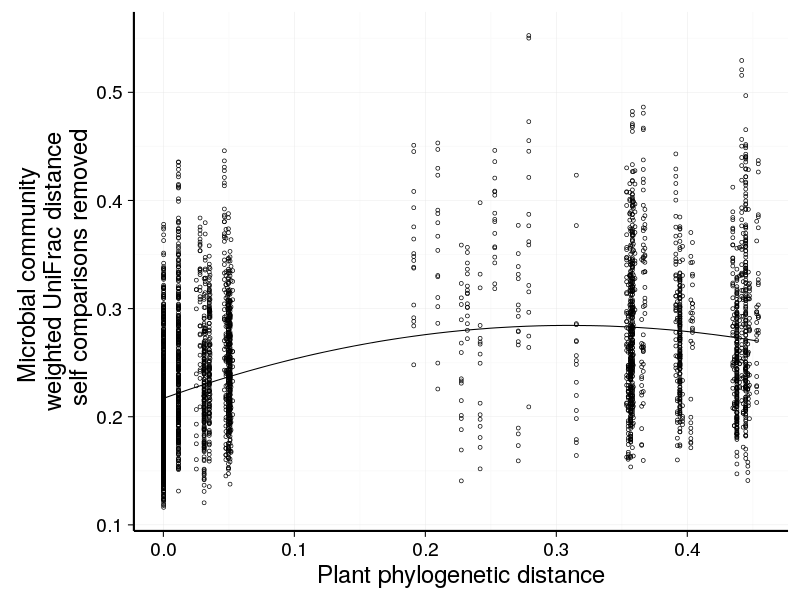

In [121]:
%%R -w 800 -h 600
test <- function(x) {-.701*x ^ 2 + .435*x + .217}

p = ggplot(SubDist, aes(y = w_Unif_Dist, x = phy_Dist)) 
p = p + geom_point(pch = 21) #aes(size = phy_Dist), shape = 1)
#p = p + stat_smooth(method = "lm", se = FALSE)
p = p + theme_bw(base_size = 24)
p = p + theme(panel.border = element_blank()) 
p = p + theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_line(color="black", size = 1))

# p = p + stat_smooth(method = lm, y ~ poly(x,2), se = FALSE)
p = p + stat_function(fun = test)
# p = p + stat_smooth(method = "lm", se = FALSE)
p = p + labs(x = "Plant phylogenetic distance")
p = p + labs(y = "Microbial community \n weighted UniFrac distance \n self comparisons removed")
p

# Sandbox

# GLS if intraspecific and self comparisons are removed

## Is sample date more informative than time once self and intra-specific comparisons are removed

In [36]:
%%R
dim(Dist) %>% print
SubDist = filter(Dist, phy_Dist > 0.003)
dim(SubDist) %>% print


[1] 3741   18
[1] 2716   18


In [116]:
%%R

fit_ds1 =  gls(w_Unif_Dist ~ SameDay, 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = SubDist)
summary(fit_ds1)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ SameDay 
  Data: SubDist 
        AIC       BIC   logLik
  -8748.342 -8724.718 4378.171

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
     Rho 
0.261462 

Coefficients:
                 Value   Std.Error  t-value p-value
(Intercept) 0.21111869 0.008114730 26.01672       0
SameDay1    0.04879541 0.003769404 12.94513       0

 Correlation: 
         (Intr)
SameDay1 -0.437

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.11673194 -0.57448135  0.04605114  0.75999517  4.44195150 

Residual standard error: 0.06588294 
Degrees of freedom: 2716 total; 2714 residual


In [37]:
%%R

fit_ds2 =  gls(w_Unif_Dist ~ TimeDist, 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = SubDist)
summary(fit_ds2)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ TimeDist 
  Data: SubDist 
        AIC       BIC   logLik
  -8832.812 -8809.188 4420.406

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.2690645 

Coefficients:
                 Value   Std.Error  t-value p-value
(Intercept) 0.23104818 0.007555870 30.57863       0
TimeDist    0.00148255 0.000090664 16.35215       0

 Correlation: 
         (Intr)
TimeDist -0.21 

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.28999174 -0.58080086  0.02360467  0.74334256  4.27966007 

Residual standard error: 0.06577294 
Degrees of freedom: 2716 total; 2714 residual


In [38]:
%%R
fit_ds3 =  gls(w_Unif_Dist ~ poly(TimeDist, 2), 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = SubDist)
summary(fit_ds3)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ poly(TimeDist, 2) 
  Data: SubDist 
        AIC       BIC   logLik
  -8901.364 -8871.835 4455.682

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.2704501 

Coefficients:
                        Value  Std.Error  t-value p-value
(Intercept)         0.2578574 0.00734522 35.10549       0
poly(TimeDist, 2)1  0.8314166 0.06349334 13.09455       0
poly(TimeDist, 2)2 -0.4543972 0.05766800 -7.87954       0

 Correlation: 
                   (Intr) p(TD,2)1
poly(TimeDist, 2)1 0.012          
poly(TimeDist, 2)2 0.006  0.324   

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.3807145 -0.5754508  0.0334641  0.7583578  4.2436324 

Residual standard error: 0.06522988 
Degrees of freedom: 2716 total; 2713 residual


In [164]:
%%R
fit_ds3 =  gls(w_Unif_Dist ~ I(TimeDist) + I(TimeDist^2), 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = SubDist)
summary(fit_ds3)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ I(TimeDist) + I(TimeDist^2) 
  Data: SubDist 
        AIC       BIC   logLik
  -8869.898 -8840.369 4439.949

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.2704501 

Coefficients:
                    Value   Std.Error   t-value p-value
(Intercept)    0.22087663 0.007620071 28.986164       0
I(TimeDist)    0.00324065 0.000240428 13.478636       0
I(TimeDist^2) -0.00004475 0.000005679 -7.879539       0

 Correlation: 
              (Intr) I(TmD)
I(TimeDist)   -0.234       
I(TimeDist^2)  0.169 -0.928

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-2.3807145 -0.5754508  0.0334641  0.7583578  4.2436325 

Residual standard error: 0.06522988 
Degrees of freedom: 2716 total; 2713 residual


In [163]:
%%R

fit_ds4 =  gls(w_Unif_Dist ~ I(phy_Dist) + I(phy_Dist^2), 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = SubDist)
summary(fit_ds4)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ I(phy_Dist) + I(phy_Dist^2) 
  Data: SubDist 
        AIC       BIC   logLik
  -8603.568 -8574.039 4306.784

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.2299531 

Coefficients:
                   Value  Std.Error   t-value p-value
(Intercept)    0.2366985 0.00804425 29.424553   0e+00
I(phy_Dist)    0.3651670 0.08627919  4.232388   0e+00
I(phy_Dist^2) -0.7108636 0.17614636 -4.035642   1e-04

 Correlation: 
              (Intr) I(p_D)
I(phy_Dist)   -0.535       
I(phy_Dist^2)  0.514 -0.994

Standardized residuals:
         Min           Q1          Med           Q3          Max 
-2.229090837 -0.609663075 -0.007727679  0.741762512  4.232338518 

Residual standard error: 0.06382855 
Degrees of freedom: 2716 total; 2713 residual


In [ ]:
%%R
fit_ds5 =  gls(w_Unif_Dist ~ I(TimeDist) + I(TimeDist^2) + I(phy_Dist) + I(phy_Dist^2), 
             correlation = corMLPE(form= ~ PlotA + PlotB), data = SubDist)
summary(fit_ds5)

In [161]:
%%R
summary(fit_ds5)

Generalized least squares fit by REML
  Model: w_Unif_Dist ~ I(TimeDist) + I(TimeDist^2) + I(phy_Dist) + I(phy_Dist^2) 
  Data: SubDist 
        AIC       BIC   logLik
  -8890.868 -8849.533 4452.434

Correlation Structure: corMLPE
 Formula: ~PlotA + PlotB 
 Parameter estimate(s):
      Rho 
0.2588424 

Coefficients:
                   Value  Std.Error   t-value p-value
(Intercept)    0.2019245 0.00847352 23.830071       0
I(TimeDist)    0.0032237 0.00023926 13.473800       0
I(TimeDist^2) -0.0000412 0.00000570 -7.238221       0
I(phy_Dist)    0.4358598 0.08391531  5.194044       0
I(phy_Dist^2) -0.9380151 0.17165240 -5.464620       0

 Correlation: 
              (Intr) I(TmD) I(TD^2 I(p_D)
I(TimeDist)   -0.200                     
I(TimeDist^2)  0.138 -0.919              
I(phy_Dist)   -0.499 -0.017  0.053       
I(phy_Dist^2)  0.482  0.016 -0.066 -0.994

Standardized residuals:
         Min           Q1          Med           Q3          Max 
-2.384940977 -0.614320397 -0.008011826  0

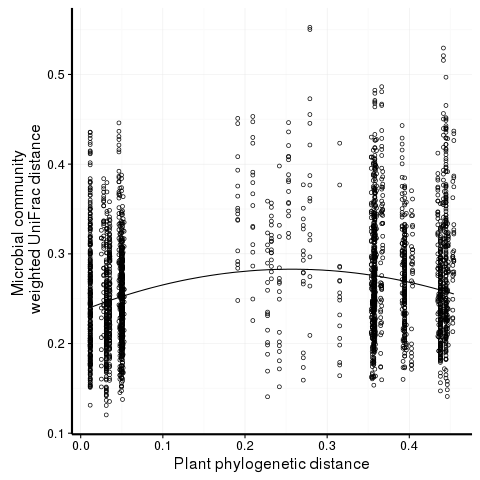

In [166]:
%%R
test <- function(x) {-.710*x ^ 2 + .365*x + .236}
ps = ggplot(SubDist, aes(y = w_Unif_Dist, x = phy_Dist)) 
ps= ps + geom_point(pch = 21) #aes(size = phy_Dist), shape = 1)
#p = p + stat_smooth(method = "lm", se = FALSE)
ps = ps + theme_bw(base_size = 16)
ps = ps + theme(panel.border = element_blank()) 
ps = ps + theme(axis.line.x = element_line(color="black", size = 1),
    axis.line.y = element_line(color="black", size = 1))

# p = p + stat_smooth(method = lm, y ~ poly(x,2), se = FALSE)
ps = ps + stat_function(fun = test)
# p = p + stat_smooth(method = "lm", se = FALSE)
ps = ps + labs(x = "Plant phylogenetic distance")
ps = ps + labs(y = "Microbial community \n weighted UniFrac distance")
ps